# Part1

# Import necessary package

In [318]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.metrics import structural_similarity as ssim

# Read image, resize, and convert to gray scale

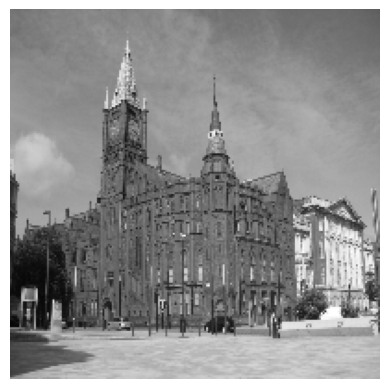

In [319]:
# Transfer BGR to RGB to avoid incorrect color
def bgr_to_rgb(bgr):
    image_rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return image_rgb


image = cv2.imread('./victoria.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))
img = image.copy()
img2 = image.copy()
# Show the original image
plt.axis("off")
plt.imshow(bgr_to_rgb(image))
plt.show()

# convolve2d function

In [320]:
# Set default padding_value = 0, can be changed when call the function
def convolve2d(image, kernel, padding_value=0):
    # Get sieze of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate pad size
    pad_width = kernel_width // 2
    pad_height = kernel_height // 2

    # Pad to the image
    padded_image = np.pad(image, ((pad_width, pad_height), (pad_width, pad_height)), mode='constant',
                          constant_values=padding_value)

    # Create the output image(with same size as the input image)
    output = np.zeros_like(image, dtype=np.float32)

    # Perform the convolution
    for y in range(image_height):
        for x in range(image_width):
            # Apply the kernel to the corresponding image region and sum the result
            output[y, x] = np.sum(kernel * padded_image[y:y + kernel_height, x:x + kernel_width])

    # Make pixel values are within reasonable limits
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output


# Set a kernel

In [321]:
kernel_1 = np.ones((5, 5), np.float32) / 25
kernel_2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], np.float32)

# Perform convolution use two different fuction

In [322]:
# Use non_opencv
start_time = time.time()
non_opencv_convolution = convolve2d(img, kernel_1)
non_opencv_time_1 = time.time() - start_time
start_time = time.time()
non_opencv_convolution_2 = convolve2d(img, kernel_2)
non_opencv_time_2 = time.time() - start_time
# Use filter2D
start_time = time.time()
opencv_convolution = cv2.filter2D(img2, -1, kernel_1)
opencv_time_1 = time.time() - start_time
start_time = time.time()
opencv_convolution_2 = cv2.filter2D(img2, -1, kernel_2)
opencv_time_2 = time.time() - start_time

#Display run time difference
print(f"Non OpenCV Convolution with Kernel 1: {non_opencv_time_1} seconds")
print(f"OpenCV filter2D with Kernel 1: {opencv_time_1} seconds")
print(f"Non OpenCV Convolution with Kernel 2: {non_opencv_time_2} seconds")
print(f"OpenCV filter2D with Kernel 2: {opencv_time_2} seconds")


Non OpenCV Convolution with Kernel 1: 0.10860967636108398 seconds
OpenCV filter2D with Kernel 1: 0.0 seconds
Non OpenCV Convolution with Kernel 2: 0.10886979103088379 seconds
OpenCV filter2D with Kernel 2: 0.0 seconds


# Visualize the original and convolved image (Visual Comparison)

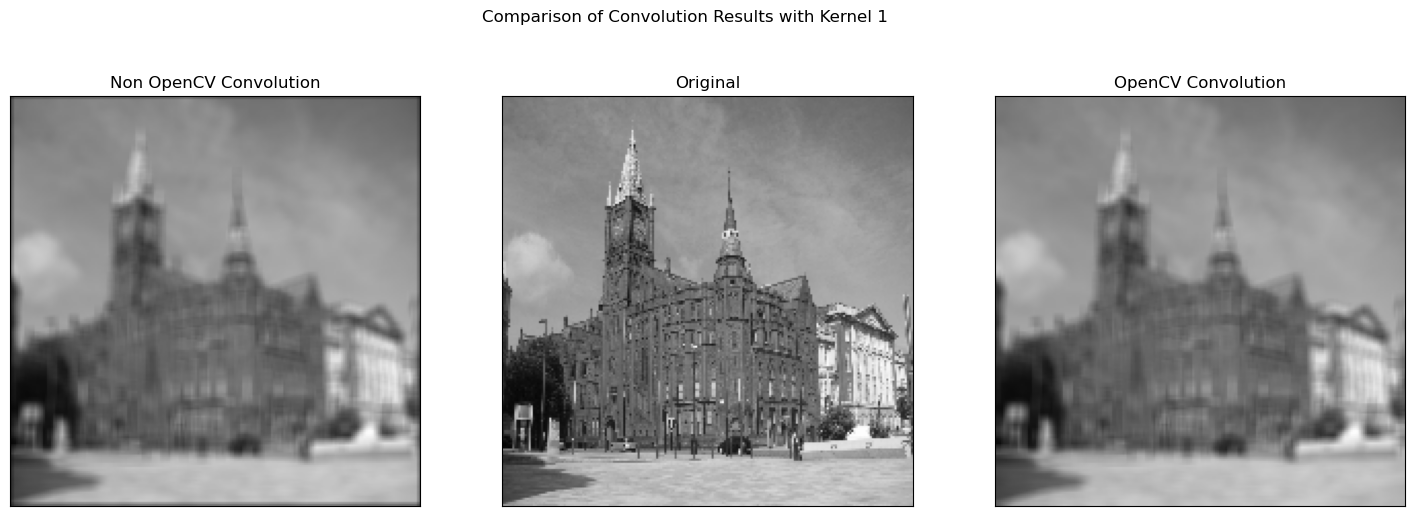

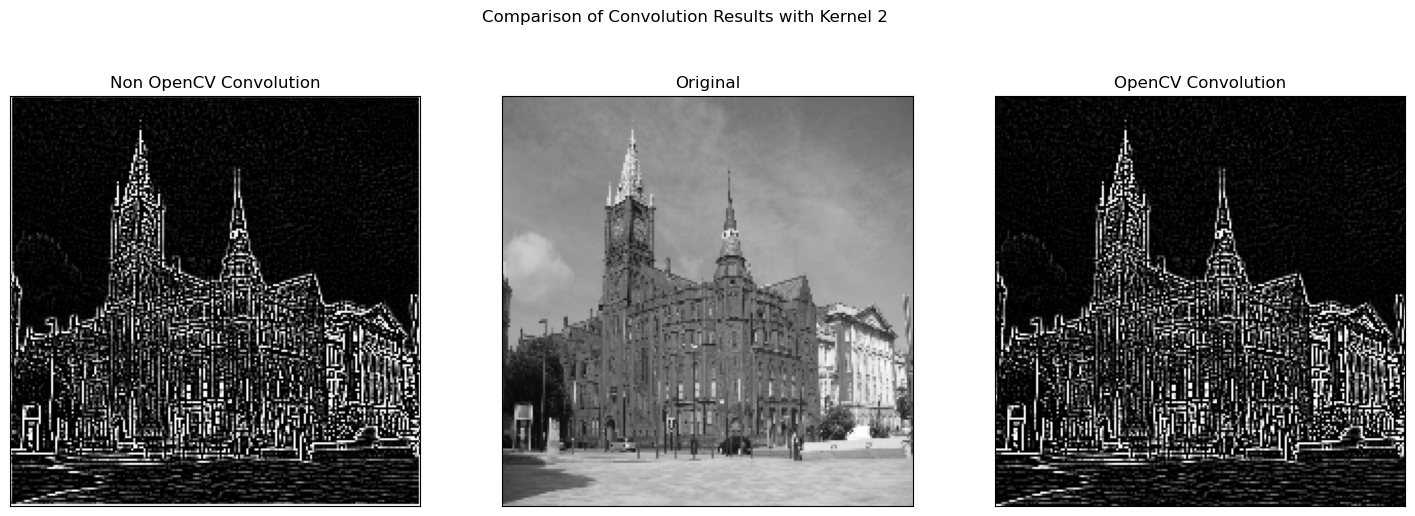

In [323]:
# Kernel_1
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(image))
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(non_opencv_convolution))
plt.title('Non OpenCV Convolution')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(opencv_convolution))
plt.title('OpenCV Convolution')
plt.xticks([]), plt.yticks([])

plt.suptitle('Comparison of Convolution Results with Kernel 1')

plt.show()

# Kernel_2
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(image))
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(non_opencv_convolution_2))
plt.title('Non OpenCV Convolution')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(opencv_convolution_2))
plt.title('OpenCV Convolution')
plt.xticks([]), plt.yticks([])

plt.suptitle('Comparison of Convolution Results with Kernel 2')

plt.show()

# Numerical Comparison

In [324]:
# Calculate difference
difference_matrix = np.abs(non_opencv_convolution.astype(np.int32) - opencv_convolution.astype(np.int32))
# Make pixel values are within reasonable limits
difference_matrix = np.clip(difference_matrix, 0, 255).astype(np.uint8)
difference_matrix_2 = np.abs(non_opencv_convolution_2.astype(np.int32) - opencv_convolution_2.astype(np.int32))
# Make pixel values are within reasonable limits
difference_matrix_2 = np.clip(difference_matrix_2, 0, 255).astype(np.uint8)
# Calculate absolute difference
absolute_difference_max1 = np.max(difference_matrix)
absolute_difference_max2 = np.max(difference_matrix_2)
absolute_difference_min1 = np.min(difference_matrix)
absolute_difference_min2 = np.min(difference_matrix_2)
absolute_difference_mean1 = np.mean(difference_matrix)
absolute_difference_mean2 = np.mean(difference_matrix_2)
#Calculate the Mean Squared Error
mse = np.mean((non_opencv_convolution - opencv_convolution) ** 2)
mse_2 = np.mean((non_opencv_convolution_2 - opencv_convolution_2) ** 2)
#Caluculate SSIM
ssim1 = ssim(non_opencv_convolution, opencv_convolution)
ssim2 = ssim(non_opencv_convolution_2, opencv_convolution_2)

# Print out and show difference_matrix, also the mean squared error

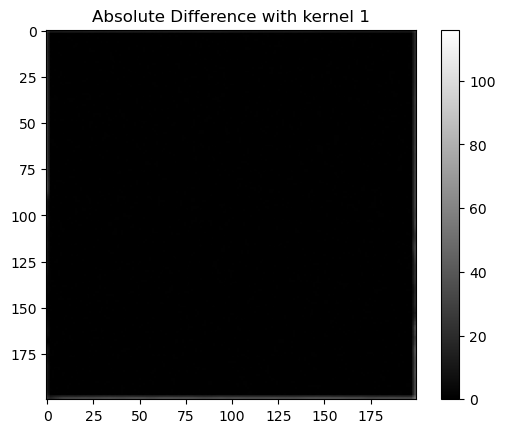

Numerical Difference matrix with kernel 1 : [[ 75  62  47 ...  39  51  62]
 [ 61  42  23 ...  20  35  50]
 [ 48  24   0 ...   0  20  39]
 ...
 [ 37  18   1 ...   0  36  72]
 [ 50  35  22 ...  37  65  93]
 [ 59  46  36 ...  73  94 116]]
Mean Squared Error with kernel 1: 5.186025
Structural Similarity Index Measure with kernel 1: 0.9742742286496467
Maximum Absolute Difference with kernel 1: 116
Minimum Absolute Difference with kernel 1: 0
Mean Absolute Difference with kernel 1: 2.107225


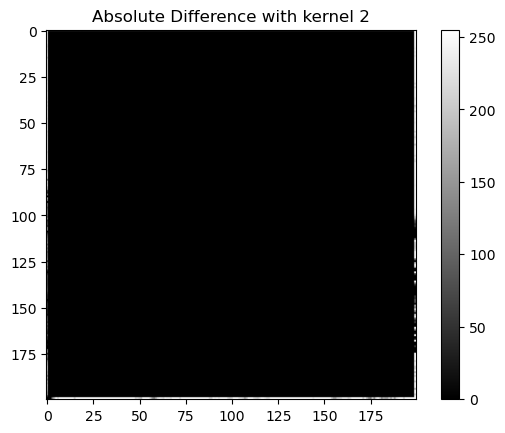

Numerical Difference matrix with kernel 2: [[249 254 255 ... 255 254 255]
 [255   0   0 ...   0   0 255]
 [245   0   0 ...   0   0 255]
 ...
 [162   0   0 ...   0   0 221]
 [ 51   0   0 ...   0   0 252]
 [  0   0   0 ... 255 255 255]]
Mean Squared Error with kernel 2: 0.86025
Structural Similarity Index Measure with kernel 2: 0.984284247965808
Maximum Absolute Difference with kernel 2: 255
Minimum Absolute Difference with kernel 2: 0
Mean Absolute Difference with kernel 2: 4.20965


In [325]:
plt.imshow(bgr_to_rgb(difference_matrix), cmap='gray')
plt.colorbar()
plt.title("Absolute Difference with kernel 1")
plt.show()
print("Numerical Difference matrix with kernel 1 :", difference_matrix)
print("Mean Squared Error with kernel 1:", mse)
print("Structural Similarity Index Measure with kernel 1:", ssim1)
print("Maximum Absolute Difference with kernel 1:", np.max(absolute_difference_max1))
print("Minimum Absolute Difference with kernel 1:", np.min(absolute_difference_min1))
print("Mean Absolute Difference with kernel 1:", np.mean(absolute_difference_mean1))

plt.imshow(bgr_to_rgb(difference_matrix_2), cmap='gray')
plt.colorbar()
plt.title("Absolute Difference with kernel 2")
plt.show()
print("Numerical Difference matrix with kernel 2:", difference_matrix_2)
print("Mean Squared Error with kernel 2:", mse_2)
print("Structural Similarity Index Measure with kernel 2:", ssim2)
print("Maximum Absolute Difference with kernel 2:", np.max(absolute_difference_max2))
print("Minimum Absolute Difference with kernel 2:", np.min(absolute_difference_min2))
print("Mean Absolute Difference with kernel 2:", np.mean(absolute_difference_mean2))

# Part2

# Read and show image

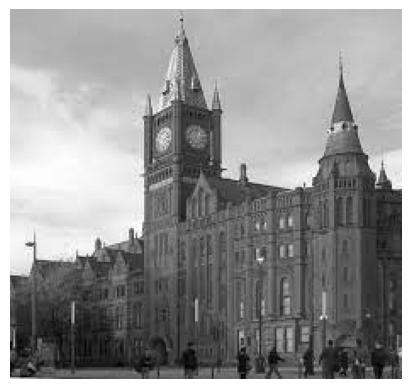

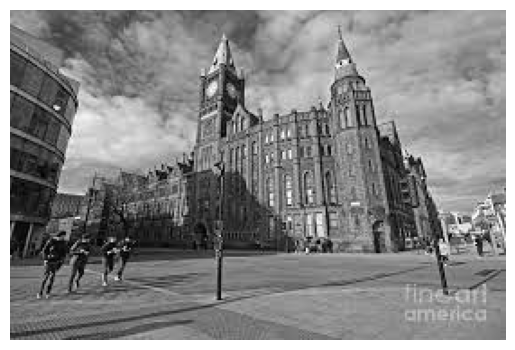

In [326]:
img_victoria1 = cv2.imread('victoria1.jpg', cv2.IMREAD_GRAYSCALE)
img_victoria2 = cv2.imread('victoria2.jpg', cv2.IMREAD_GRAYSCALE)
# Show the original image
plt.axis("off")
plt.imshow(bgr_to_rgb(img_victoria1))
plt.show()
# Show the original image
plt.axis("off")
plt.imshow(bgr_to_rgb(img_victoria2))
plt.show()

# Part 2-B

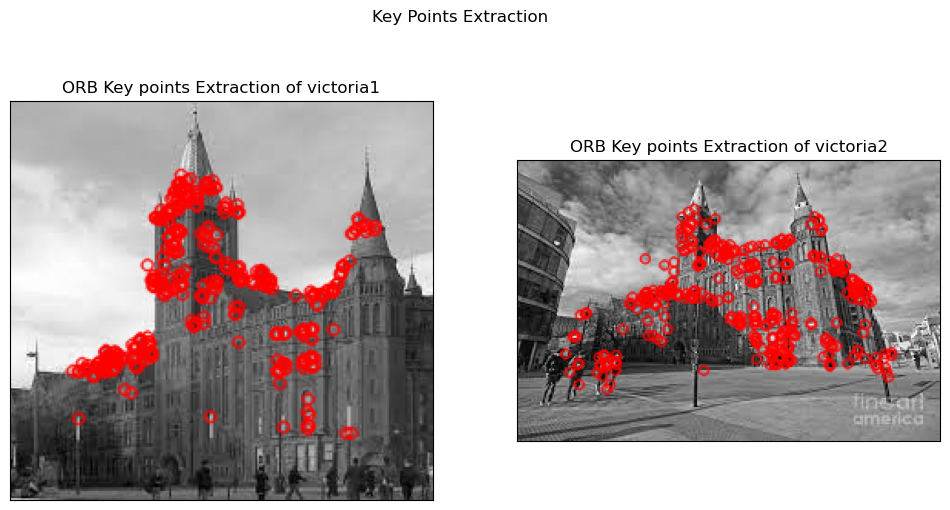

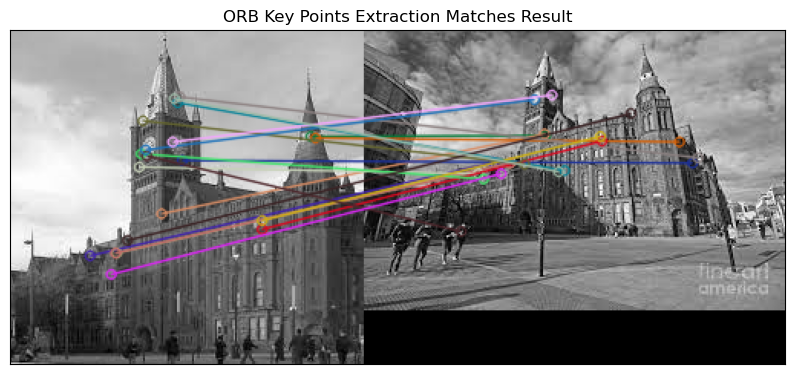

In [327]:
# Initiate ORB detector
orb = cv2.ORB_create()
# Find the key points
key_points_1_orb = orb.detect(img_victoria1, None)
key_points_2_orb = orb.detect(img_victoria2, None)

# Compute descriptors with ORB
key_points_1_orb, descriptors_1_orb = orb.compute(img_victoria1, key_points_1_orb)
key_points_2_orb, descriptors_2_orb = orb.compute(img_victoria2, key_points_2_orb)

# Create BFMatcher object
brute_force_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = brute_force_matcher.match(descriptors_1_orb, descriptors_2_orb)
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)
# Draw first 20 matches.
result = cv2.drawMatches(img_victoria1, key_points_1_orb, img_victoria2, key_points_2_orb, matches[:20], None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Draw key points on two images
img1_orb = cv2.drawKeypoints(img_victoria1, key_points_1_orb, None, color=(255, 0, 0), flags=0)
img2_orb = cv2.drawKeypoints(img_victoria2, key_points_2_orb, None, color=(255, 0, 0), flags=0)

#Show key points of victoria1
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img1_orb), plt.title('ORB Key points Extraction of victoria1'), plt.xticks([]), plt.yticks([])
#Show key points of victoria2
plt.subplot(1,2,2)
plt.imshow(img2_orb), plt.title('ORB Key points Extraction of victoria2'), plt.xticks([]), plt.yticks([])
plt.suptitle("Key Points Extraction")
plt.show()


#Show key points matches of victoria1 and victoria2
plt.figure(figsize=(10, 10))
plt.imshow(result), plt.title('ORB Key Points Extraction Matches Result'), plt.xticks([]), plt.yticks([])
plt.show()


# Part 2-C

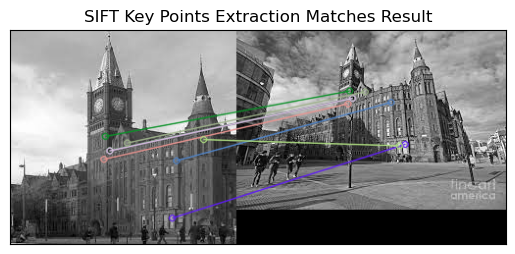

In [328]:
# Create sift object
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img_victoria1,None)
keypoints2, descriptors2 = sift.detectAndCompute(img_victoria2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.77*n.distance:
        good.append([m])

# Draw matching results
img_result = cv2.drawMatchesKnn(img_victoria1, keypoints1, img_victoria2, keypoints2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_result)
plt.title('SIFT Key Points Extraction Matches Result'), plt.xticks([]), plt.yticks([])
plt.show()
